<a href="https://colab.research.google.com/github/chaerui7967/ko_Apartment_Deal/blob/master/Apart_KNregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project/Apart_Deal.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns = ['code', 'dong', 'date', 'apart_name','region_num', 'square', 'floor', 'blit_year', 'cost']
df.drop(['dong','apart_name','region_num','date'],axis=1, inplace=True)

# 층수에서 공백 행 제거
space = df[df['floor']==' '].index
df.drop(space, inplace=True)

df['floor'] = df['floor'].astype('int')

In [5]:
X = df.drop('cost', axis = 1)
y = df['cost']

Norm = MinMaxScaler()
X_Norm = Norm.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_Norm, y, test_size = 0.3, random_state = 0)

In [6]:
re = KNeighborsRegressor(n_neighbors = 10, weights = "distance")
re.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='distance')

In [9]:
# 결정 계수
print(f'R-squre = {re.score(X_test, y_test)}')

R-squre = 0.8560739059029036


In [7]:
pred = re.predict(X_test)

In [10]:
# MSE 확인
print(f'mse = {mean_squared_error(y_test, pred)}')

mse = 97591879.51849331


In [11]:
# RMSE
from math import sqrt
print(f'RMSE = {sqrt(mean_squared_error(y_test, pred))}')

RMSE = 9878.860233776633


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


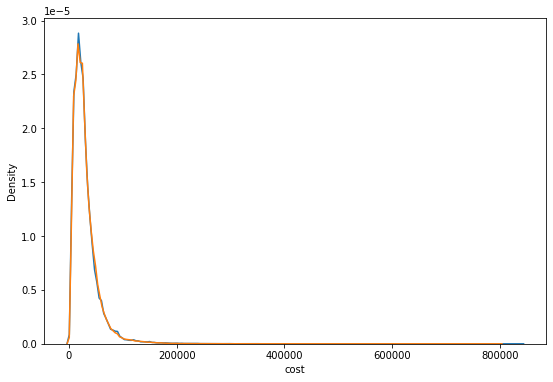

In [12]:
y_X = re.predict(X_Norm)

plt.figure(figsize = (9,6))
ax1=sns.distplot(y, hist = False, label='y')
ax2=sns.distplot(y_X, hist=False, label='y_X', ax=ax1)
plt.show()